In [ ]:
import prophet
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AustinP.csv to AustinP.csv


In [ ]:
data = pd.read_csv("AustinP.csv")

In [ ]:
data.tail()

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
3692,2024-02-11T00:00:00,27.870424,14.410426,19.789177,93.989080,36.841496,74.684410,5.3,2.9,4.004167,2.700000,1.456022,2.053184,668.63340,5411,578.44000,2.818080,NaN
3693,2024-02-12T00:00:00,28.230425,13.930426,20.120424,95.306335,32.459953,71.647310,5.3,1.6,3.450000,2.801785,1.000000,2.003868,623.37006,5389,585.98000,2.894400,NaN
3694,2024-02-13T00:00:00,28.470425,14.100426,21.511260,98.356926,33.007755,67.256160,5.1,1.2,3.220834,2.473863,0.583095,1.757366,546.60020,5310,582.47003,2.975040,NaN
3695,2024-02-14T00:00:00,28.570425,16.110424,21.699175,96.244020,39.720676,74.035576,4.6,2.0,3.229166,2.102380,0.943398,1.531127,497.14750,4800,552.63000,2.610720,NaN
3696,2024-02-15T00:00:00,29.150425,17.980425,22.623758,94.680920,47.536633,74.969450,6.6,2.6,4.454167,2.236068,1.204160,1.734011,566.51720,5096,564.79004,2.761921,NaN


In [ ]:
# Ensure 'Date' is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
from prophet import Prophet

# Rename columns to 'ds' and 'y' as required by Prophet
df = data.rename(columns={'Date': 'ds', 'TempHighF': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinvc0r5o/3pivjh1x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpinvc0r5o/x01b050q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1922', 'data', 'file=/tmp/tmpinvc0r5o/3pivjh1x.json', 'init=/tmp/tmpinvc0r5o/x01b050q.json', 'output', 'file=/tmp/tmpinvc0r5o/prophet_model19ski3ra/prophet_model-20250912070937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making Predictions Create a future DataFrame for predictions:
# Generate future dates
future = model.make_future_dataframe(periods=730)  # Forecast 30 days into the future
forecast = model.predict(future)

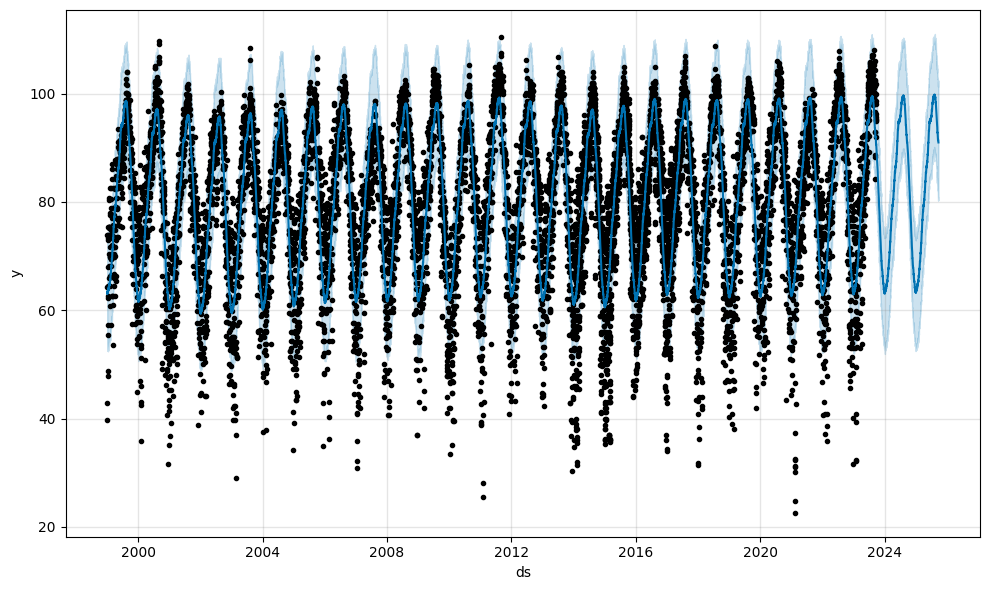

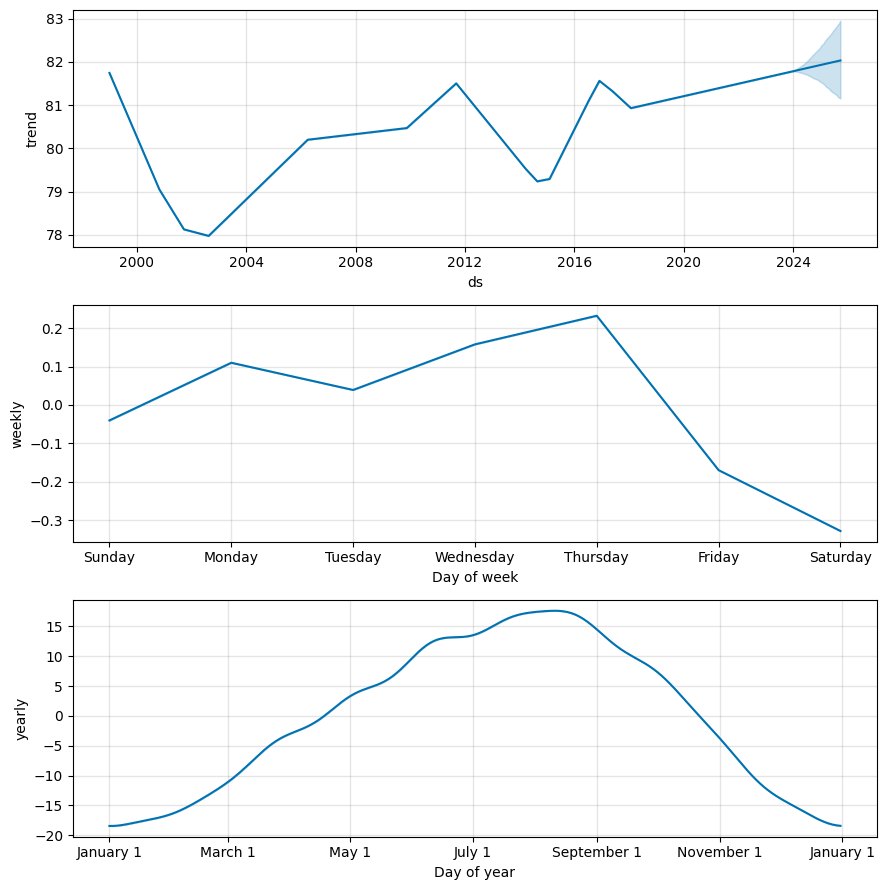

In [ ]:
# Visualizing Results
import matplotlib.pyplot as plt

# Plot forecast
model.plot(forecast)
plt.show()

# Plot forecast components (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp16ihv4oq/ugpyqnxm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp16ihv4oq/esy97n3y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51039', 'data', 'file=/tmp/tmp16ihv4oq/ugpyqnxm.json', 'init=/tmp/tmp16ihv4oq/esy97n3y.json', 'output', 'file=/tmp/tmp16ihv4oq/prophet_modeldcmuxzlh/prophet_model-20250818084550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:45:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:45:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


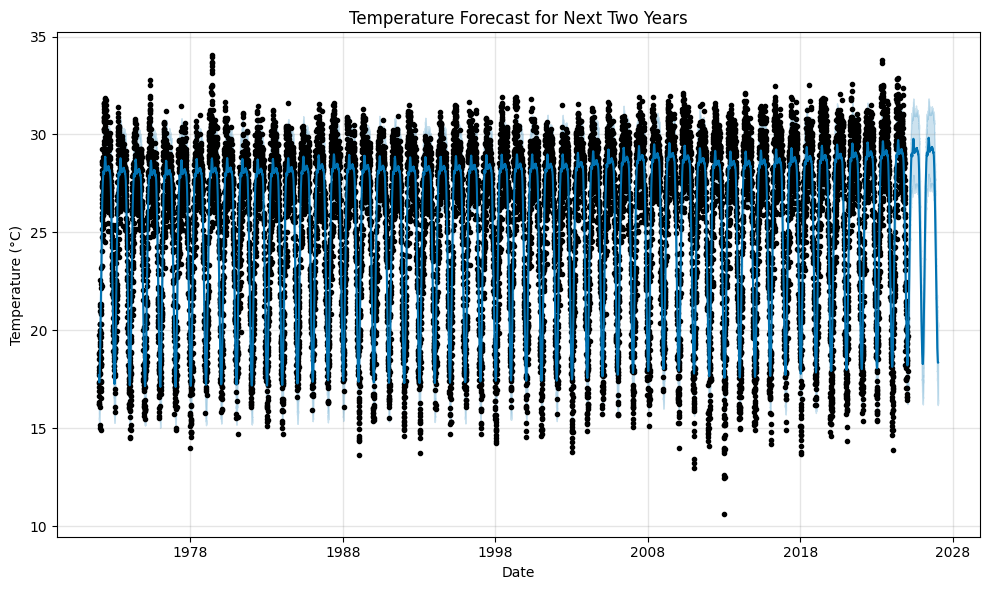

In [ ]:
# Load the dataset
df = pd.read_csv("Dhaka_Jan-1972-to-Jan-2025.csv")

# Prepare the data for Prophet
# Rename columns to 'ds' for date and 'y' for the target variable
df_prophet = df[['date', 'TempMean']].rename(columns={'date': 'ds', 'TempMean': 'y'})

# Convert 'ds' column to datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a dataframe to hold predictions for the next 730 days (2 years)
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Temperature Forecast for Next Two Years")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()



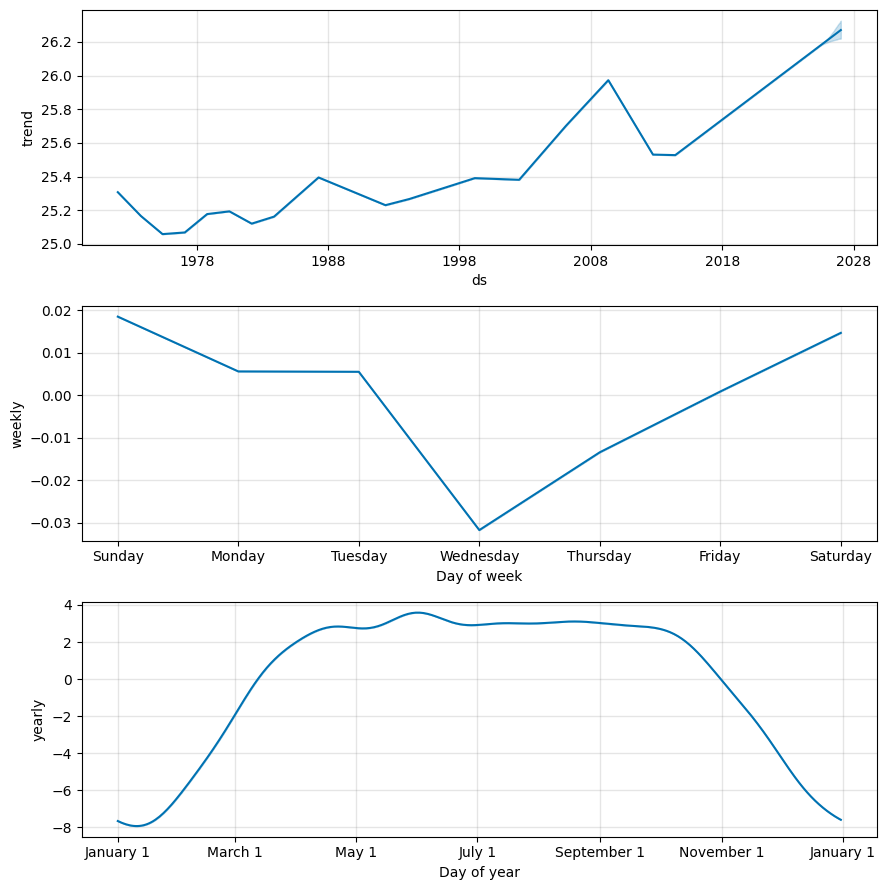

In [ ]:
# Plot forecast components (trend, seasonality, etc.)
model.plot_components(forecast)
plt.show()